In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('datasets/lung_cancer_prediction_dataset.csv')
df.isnull().sum()

ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [7]:
df.drop(columns=['Cancer_Stage', 'Treatment_Type'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  object 
 13 

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  object 
 13 

In [11]:
df.to_csv('datasets/cleaned-lung-cancer.csv')

In [12]:
df = pd.read_csv('datasets/cleaned-lung-cancer.csv')

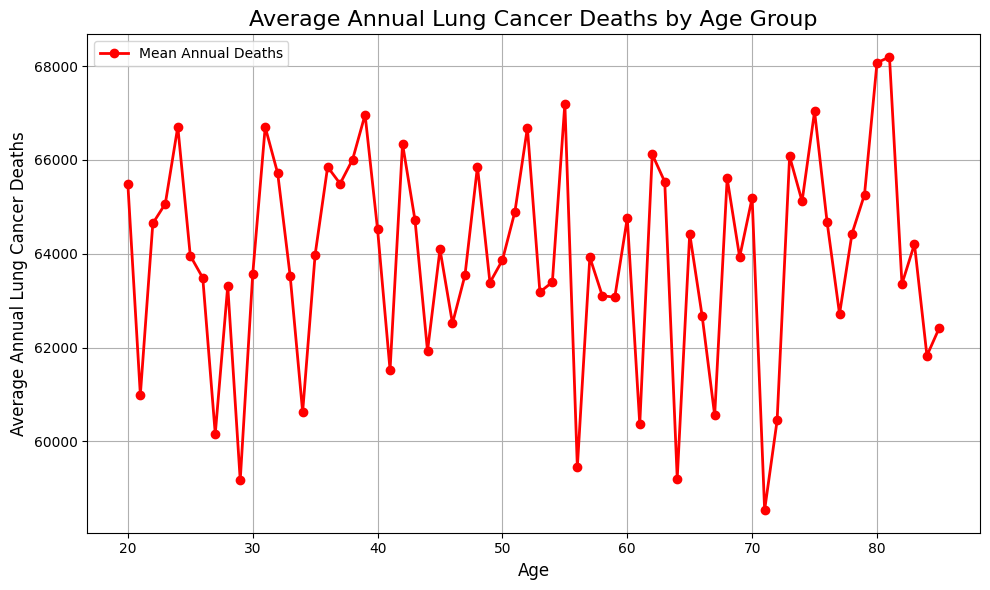

In [13]:
age_grouped = df.groupby('Age')['Annual_Lung_Cancer_Deaths'].mean()

plt.figure(figsize=(10, 6))
plt.plot(
    age_grouped.index, 
    age_grouped.values, 
    marker='o', 
    color='red', 
    linestyle='-', 
    linewidth=2, 
    label='Mean Annual Deaths'
)

plt.title('Average Annual Lung Cancer Deaths by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Annual Lung Cancer Deaths', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

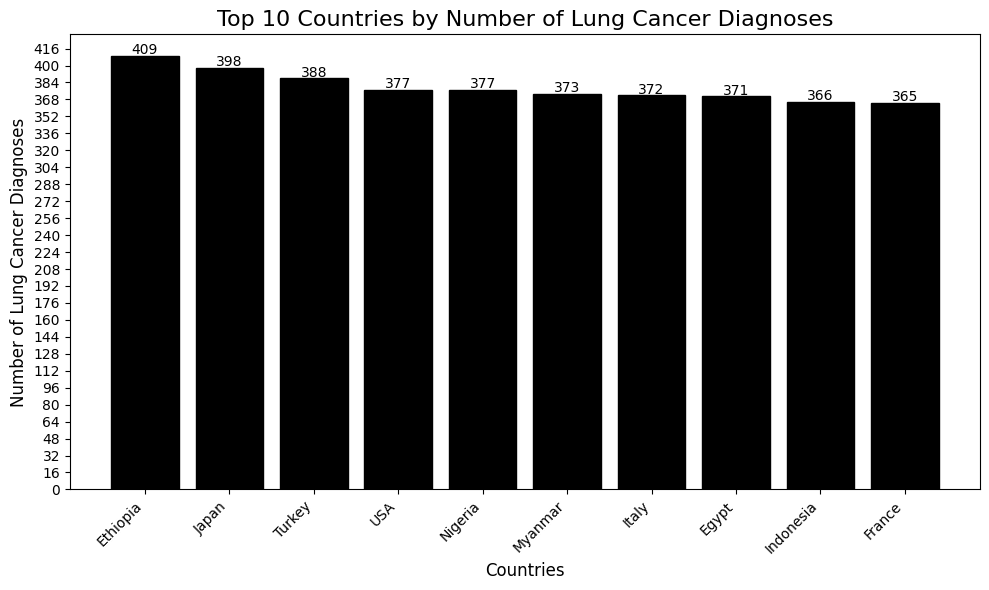

In [14]:
lung_cancer_counts = df[df['Lung_Cancer_Diagnosis'] == 'Yes']['Country'].value_counts()

sorted_countries = lung_cancer_counts.sort_values(ascending=False)

top_n = 10
top_countries = sorted_countries.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='black', edgecolor='black')

y_max = top_countries.max()
y_step = max(1, int(y_max / 25))  
plt.yticks(range(0, y_max + y_step, y_step), fontsize=10)

for i, value in enumerate(top_countries.values):
    plt.text(i, value + y_step * 0.1, str(value), ha='center', fontsize=10, color='black')

plt.title('Top 10 Countries by Number of Lung Cancer Diagnoses', fontsize=16)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Lung Cancer Diagnoses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

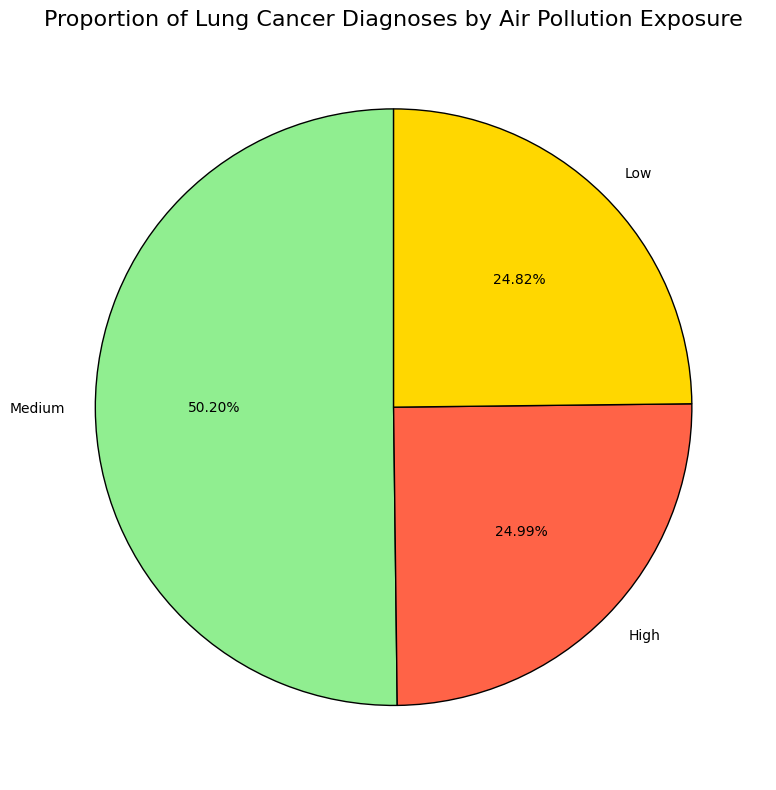

In [15]:
lung_cancer_cases = df[df['Lung_Cancer_Diagnosis'] == 'Yes']

pollution_exposure_counts = lung_cancer_cases['Air_Pollution_Exposure'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    pollution_exposure_counts.values, 
    labels=pollution_exposure_counts.index, 
    autopct='%1.2f%%',
    startangle=90,
    colors=['lightgreen', 'tomato', 'gold'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proportion of Lung Cancer Diagnoses by Air Pollution Exposure', fontsize=16)

plt.tight_layout()
plt.show()

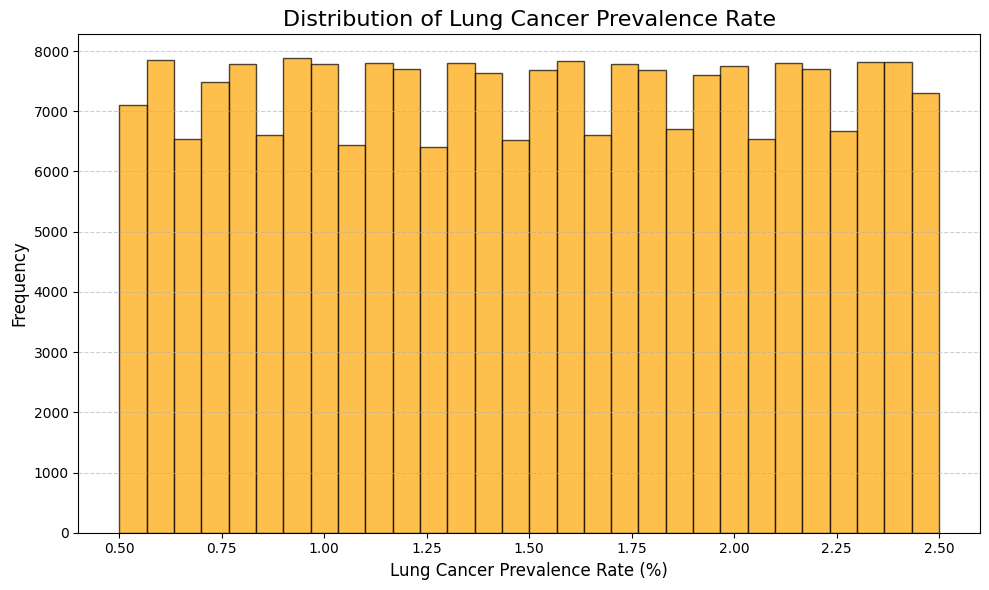

In [16]:
plt.figure(figsize=(10, 6))

plt.hist(
    df['Lung_Cancer_Prevalence_Rate'],
    bins=30,                          
    color='orange',                   
    edgecolor='black',                
    alpha=0.7                         
)

plt.title('Distribution of Lung Cancer Prevalence Rate', fontsize=16)
plt.xlabel('Lung Cancer Prevalence Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   220632 non-null  int64  
 1   ID                           220632 non-null  int64  
 2   Country                      220632 non-null  object 
 3   Population_Size              220632 non-null  int64  
 4   Age                          220632 non-null  int64  
 5   Gender                       220632 non-null  object 
 6   Smoker                       220632 non-null  object 
 7   Years_of_Smoking             220632 non-null  int64  
 8   Cigarettes_per_Day           220632 non-null  int64  
 9   Passive_Smoker               220632 non-null  object 
 10  Family_History               220632 non-null  object 
 11  Lung_Cancer_Diagnosis        220632 non-null  object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [39]:
data = df.drop(columns=['Lung_Cancer_Diagnosis']) 
target = df['Lung_Cancer_Diagnosis'].map({'No': 0, 'Yes': 1}) 

In [40]:
data.head()

,Unnamed: 0,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Yes,Low,Yes,No,Poor,No,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Yes,Low,Yes,No,Poor,No,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Yes,Medium,No,No,Poor,Yes,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Yes,Low,No,No,Poor,No,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Yes,Medium,Yes,No,Poor,No,Developing,15000,2.44,0.0


In [43]:
X = data[['Age', 'Smoker', 'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker', 'Air_Pollution_Exposure', 'Occupational_Exposure', 'Early_Detection', 'Developed_or_Developing']]
y = target

In [45]:
encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        encoders[column] = le

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Age                      220632 non-null  int64
 1   Smoker                   220632 non-null  int64
 2   Years_of_Smoking         220632 non-null  int64
 3   Cigarettes_per_Day       220632 non-null  int64
 4   Passive_Smoker           220632 non-null  int64
 5   Air_Pollution_Exposure   220632 non-null  int64
 6   Occupational_Exposure    220632 non-null  int64
 7   Early_Detection          220632 non-null  int64
 8   Developed_or_Developing  220632 non-null  int64
dtypes: int64(9)
memory usage: 15.1 MB


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [51]:
# Evaluation of Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg, zero_division = 0))

Logistic Regression Accuracy: 0.9593899426654883
Confusion Matrix:
 [[42335     0]
 [ 1792     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.00      0.00      0.00      1792

    accuracy                           0.96     44127
   macro avg       0.48      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [52]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [53]:
# Evaluation of KNN
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9583474969973033
Confusion Matrix:
 [[42286    49]
 [ 1789     3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.06      0.00      0.00      1792

    accuracy                           0.96     44127
   macro avg       0.51      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [54]:
from sklearn.svm import SVC

In [55]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [57]:
# Evaluation of Supporting Vector Classfier
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc, zero_division = 0))

SVM Accuracy: 0.9593899426654883
Confusion Matrix:
 [[42335     0]
 [ 1792     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.00      0.00      0.00      1792

    accuracy                           0.96     44127
   macro avg       0.48      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Decision Tree
DC_model = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
DC_model.fit(X_train, y_train)
y_pred = DC_model.predict(X_test)

In [62]:
# Evaluation of Decision Tree
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division = 0)

In [63]:
print('accuracy:', accuracy, '\n')
print('classification report: \n', class_report, '\n')

accuracy: 0.929906859745734 

classification report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     42335
           1       0.08      0.07      0.07      1792

    accuracy                           0.93     44127
   macro avg       0.52      0.52      0.52     44127
weighted avg       0.92      0.93      0.93     44127
 

